<a href="https://colab.research.google.com/github/huyqcl377/Pham-Quang-Huy/blob/main/MFCC_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
local_zip = '/content/drive/MyDrive/MFCC numpy 20k bee dataset.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#CNN - TRAIN LAI
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Folder paths
TRAINING_DIR = "/tmp/MFCC numpy 20k bee dataset/train"
VALIDATION_DIR = "/tmp/MFCC numpy 20k bee dataset/val"
TEST_DIR = "/tmp/MFCC numpy 20k bee dataset/test"

# Load MFCC features from numpy arrays
def load_data(directory):
    mfcc_features = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        for filename in os.listdir(label_dir):
            file_path = os.path.join(label_dir, filename)
            if not os.path.isfile(file_path):
                continue
            mfcc = np.load(file_path)
            mfcc_features.append(mfcc)
            labels.append(label)
    return mfcc_features, labels

# Load training data
train_mfcc_features, train_labels = load_data(TRAINING_DIR)

val_mfcc_features, val_labels = load_data(VALIDATION_DIR)

test_mfcc_features, test_labels = load_data(TEST_DIR)

# Convert labels to numeric values
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.transform(val_labels)
encoded_test_labels = label_encoder.transform(test_labels)

# Convert the data to NumPy arrays
X_train = np.array(train_mfcc_features)
y_train = np.array(encoded_train_labels)

X_val = np.array(val_mfcc_features)
y_val = np.array(encoded_val_labels)

X_test = np.array(test_mfcc_features)
y_test = np.array(encoded_test_labels)

# Reshape the input data to include timestep dimension
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Determine the shape of the MFCC features
input_shape = X_train.shape[1:]

# Define the model architecture
def create_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(128, 3, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(256, 3, activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model



# Create the model
model = create_model(input_shape=input_shape)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Define the callback for stopping training
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model with the callback
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), callbacks=[early_stopping_callback])
# model.save('/content/drive/MyDrive/Models/CNNsigmoid1D.h5')


Epoch 1/200
438/438 [==============================] - 11s 19ms/step - loss: 0.6153 - accuracy: 0.6440 - val_loss: 0.5153 - val_accuracy: 0.7730
Epoch 2/200
438/438 [==============================] - 6s 14ms/step - loss: 0.4656 - accuracy: 0.7723 - val_loss: 0.3972 - val_accuracy: 0.8075
Epoch 3/200
438/438 [==============================] - 8s 18ms/step - loss: 0.4141 - accuracy: 0.7966 - val_loss: 0.3848 - val_accuracy: 0.8155
Epoch 4/200
438/438 [==============================] - 6s 15ms/step - loss: 0.3452 - accuracy: 0.8376 - val_loss: 0.3438 - val_accuracy: 0.8425
Epoch 5/200
438/438 [==============================] - 8s 18ms/step - loss: 0.3244 - accuracy: 0.8513 - val_loss: 0.3027 - val_accuracy: 0.8580
Epoch 6/200
438/438 [==============================] - 7s 17ms/step - loss: 0.2933 - accuracy: 0.8698 - val_loss: 0.2866 - val_accuracy: 0.8695
Epoch 7/200
438/438 [==============================] - 9s 20ms/step - loss: 0.2686 - accuracy: 0.8812 - val_loss: 0.3022 - val_accuracy

In [ ]:
model.save('/content/drive/MyDrive/Models/CNN.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 64)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 128)            24704     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 3, 128)           0

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


125/125 [==============================] - 1s 3ms/step
Accuracy: 0.9605
Precision: 0.953248031496063
Recall: 0.9685
Confusion Matrix:
[[1905   95]
 [  63 1937]]


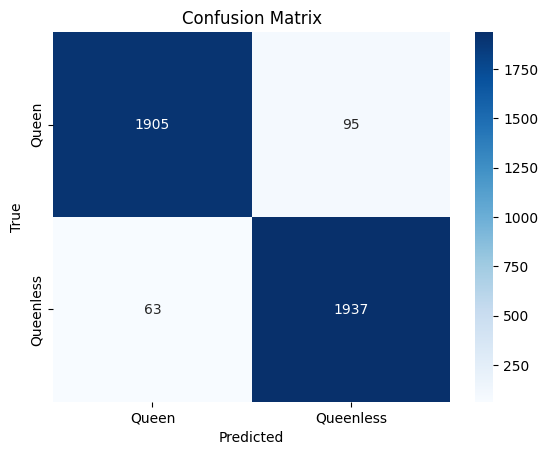

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Define the labels for the confusion matrix
labels = ['Queen', 'Queenless']

# Create a heatmap using Seaborn
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5], labels=labels)

# Display the plot
plt.show()


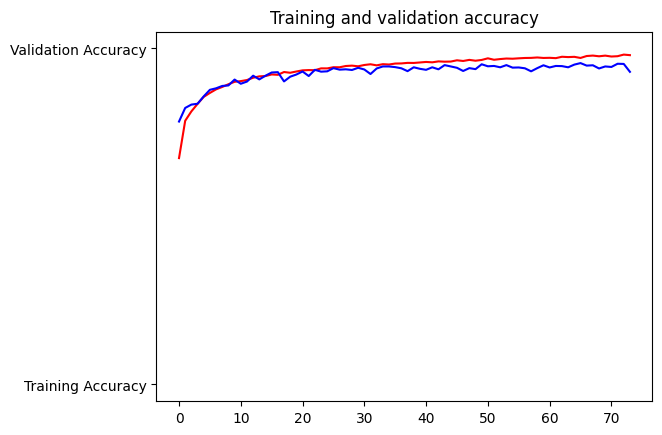

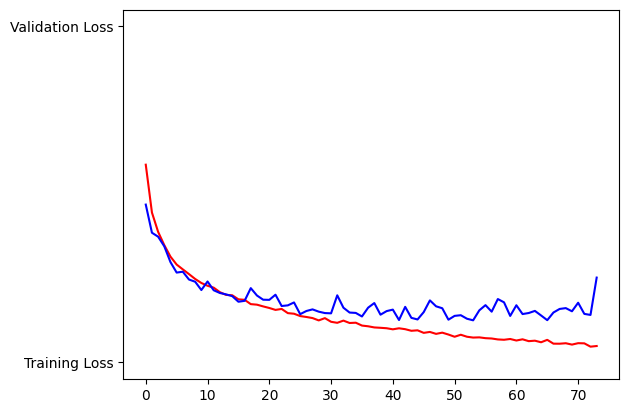

In [ ]:

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
#SVM + MFCCs
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Folder paths for training, validation, and test data
TRAINING_DIR = "/tmp/MFCC numpy 20k bee dataset/train"
VALIDATION_DIR = "/tmp/MFCC numpy 20k bee dataset/val"
TEST_DIR = "/tmp/MFCC numpy 20k bee dataset/test"

# Load MFCC features from numpy arrays
def load_data(directory):
    mfcc_features = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        for filename in os.listdir(label_dir):
            file_path = os.path.join(label_dir, filename)
            if not os.path.isfile(file_path):
                continue
            mfcc = np.load(file_path)
            mfcc_features.append(mfcc)
            labels.append(label)
    return mfcc_features, labels

# Load training data
train_mfcc_features, train_labels = load_data(TRAINING_DIR)

# Load validation data
val_mfcc_features, val_labels = load_data(VALIDATION_DIR)

# Load test data
test_mfcc_features, test_labels = load_data(TEST_DIR)

# Convert labels to numeric values
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.transform(val_labels)
encoded_test_labels = label_encoder.transform(test_labels)

# Convert the data to NumPy arrays
X_train = np.array(train_mfcc_features)
y_train = np.array(encoded_train_labels)

X_val = np.array(val_mfcc_features)
y_val = np.array(encoded_val_labels)

X_test = np.array(test_mfcc_features)
y_test = np.array(encoded_test_labels)

# Train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Predict labels for validation data
y_val_pred = svm.predict(X_val)

# Convert the predicted validation labels back to original labels
predicted_val_labels = label_encoder.inverse_transform(y_val_pred)

# Evaluate the model on validation data
accuracy = accuracy_score(val_labels, predicted_val_labels)
report = classification_report(val_labels, predicted_val_labels)
confusion_mat = confusion_matrix(val_labels, predicted_val_labels)

# Print the evaluation metrics and confusion matrix
print("SVM Classifier:")
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion_mat)

SVM Classifier:
Accuracy: 0.6765
Classification Report:
              precision    recall  f1-score   support

       Queen       0.65      0.76      0.70      1000
   Queenless       0.71      0.59      0.65      1000

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.67      2000
weighted avg       0.68      0.68      0.67      2000

Confusion Matrix:
[[762 238]
 [409 591]]


In [ ]:
# Predict labels for test data
y_test_pred = svm.predict(X_test)

# Convert the predicted test labels back to original labels
predicted_test_labels = label_encoder.inverse_transform(y_test_pred)

# Evaluate the model on test data
accuracy_test = accuracy_score(test_labels, predicted_test_labels)
report_test = classification_report(test_labels, predicted_test_labels)
confusion_mat_test = confusion_matrix(test_labels, predicted_test_labels)

# Print the evaluation metrics and confusion matrix for test data
print("Evaluation on Test Set:")
print("Accuracy:", accuracy_test)
print("Classification Report:")
print(report_test)
print("Confusion Matrix:")
print(confusion_mat_test)




Evaluation on Test Set:
Accuracy: 0.67675
Classification Report:
              precision    recall  f1-score   support

       Queen       0.65      0.76      0.70      2000
   Queenless       0.71      0.59      0.65      2000

    accuracy                           0.68      4000
   macro avg       0.68      0.68      0.67      4000
weighted avg       0.68      0.68      0.67      4000

Confusion Matrix:
[[1526  474]
 [ 819 1181]]


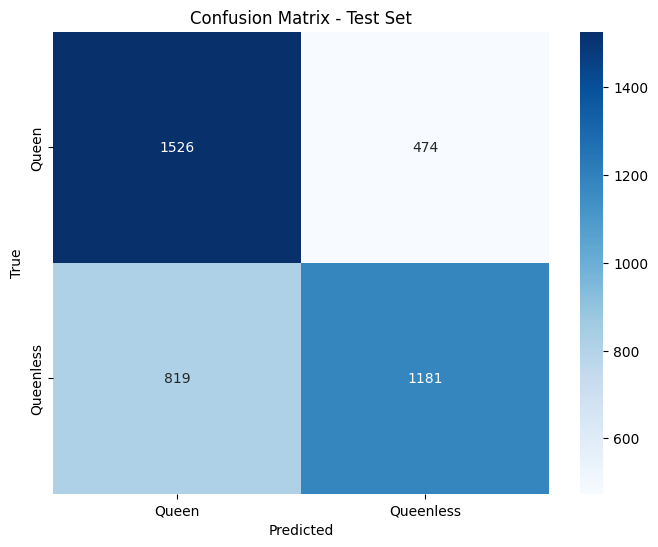

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of class labels
class_labels = label_encoder.classes_

# Compute the confusion matrix
confusion_mat_test = confusion_matrix(test_labels, predicted_test_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


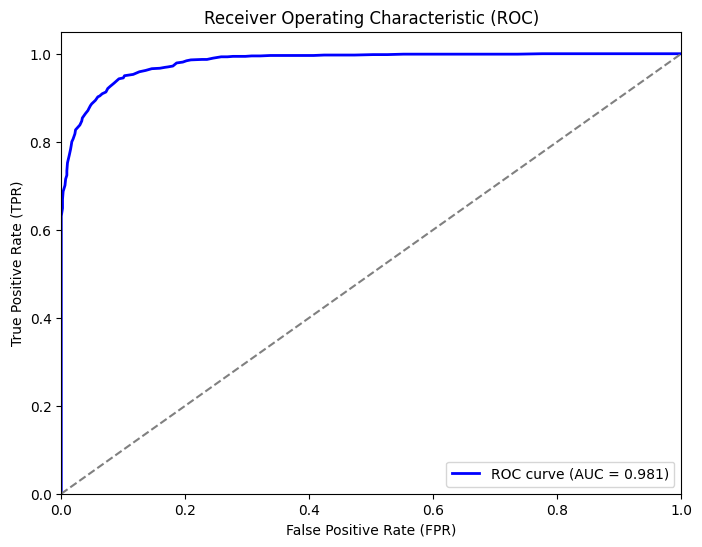

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for validation data
y_val_prob = rf.predict_proba(X_val)

# Calculate the AUC score
auc_score = roc_auc_score(y_val, y_val_prob[:, 1])

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.3f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


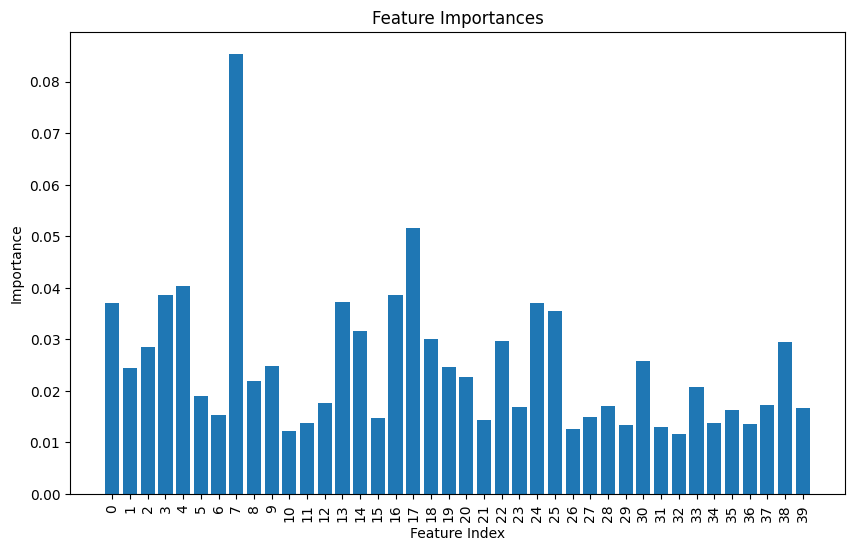

In [ ]:
# Plotting the feature importances for the Random Forest
importances = rf.feature_importances_
num_features = X_train.shape[1]
plt.figure(figsize=(10, 6))
plt.bar(range(num_features), importances)
plt.title("Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.xticks(range(num_features), range(num_features), rotation=90)
plt.show()


In [ ]:
#RANDOM FOREST + MFCCs
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Folder paths for training, validation, and test data
TRAINING_DIR = "/tmp/MFCC numpy 20k bee dataset/train"
VALIDATION_DIR = "/tmp/MFCC numpy 20k bee dataset/val"
TEST_DIR = "/tmp/MFCC numpy 20k bee dataset/test"

# Load MFCC features from numpy arrays
def load_data(directory):
    mfcc_features = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        for filename in os.listdir(label_dir):
            file_path = os.path.join(label_dir, filename)
            if not os.path.isfile(file_path):
                continue
            mfcc = np.load(file_path)
            mfcc_features.append(mfcc)
            labels.append(label)
    return mfcc_features, labels

# Load training data
train_mfcc_features, train_labels = load_data(TRAINING_DIR)

# Load validation data
val_mfcc_features, val_labels = load_data(VALIDATION_DIR)

# Load test data
test_mfcc_features, test_labels = load_data(TEST_DIR)


# Convert labels to numeric values
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.transform(val_labels)
encoded_test_labels = label_encoder.transform(test_labels)

# Convert the data to NumPy arrays
X_train = np.array(train_mfcc_features)
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = np.array(encoded_train_labels)

X_val = np.array(val_mfcc_features)
X_val = X_val.reshape(X_val.shape[0], -1)
y_val = np.array(encoded_val_labels)

X_test = np.array(test_mfcc_features)
X_test = X_test.reshape(X_test.shape[0], -1)
y_test = np.array(encoded_test_labels)

# Train the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict labels for validation data
y_val_pred = rf.predict(X_val)

# Convert the predicted validation labels back to original labels
predicted_val_labels = label_encoder.inverse_transform(y_val_pred)

# Evaluate the model on validation data
accuracy = accuracy_score(val_labels, predicted_val_labels)
report = classification_report(val_labels, predicted_val_labels)
confusion_mat = confusion_matrix(val_labels, predicted_val_labels)

# Print the evaluation metrics and confusion matrix
print("Random Forest Classifier:")
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion_mat)

Random Forest Classifier:
Accuracy: 0.9165
Classification Report:
              precision    recall  f1-score   support

       Queen       0.91      0.92      0.92      1000
   Queenless       0.92      0.91      0.92      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

Confusion Matrix:
[[923  77]
 [ 90 910]]


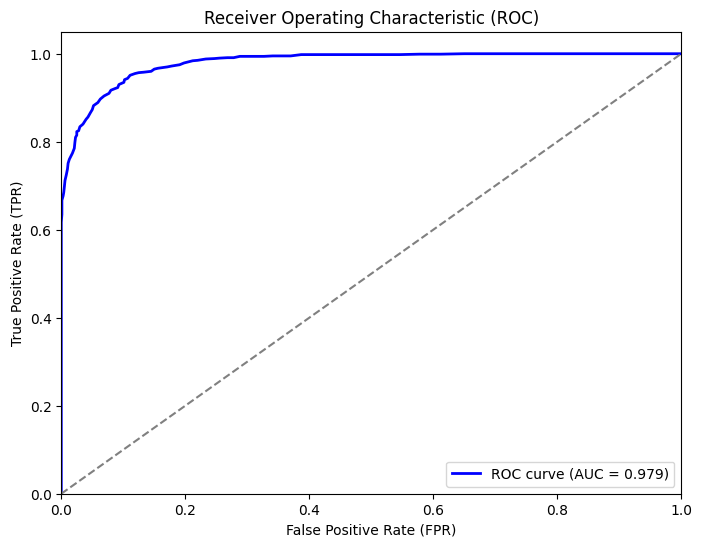

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for validation data
y_val_prob = rf.predict_proba(X_val)

# Calculate the AUC score
auc_score = roc_auc_score(y_val, y_val_prob[:, 1])

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.3f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Predict labels for validation data
y_val_pred = rf.predict(X_val)

# Convert the predicted validation labels back to original labels
predicted_val_labels = label_encoder.inverse_transform(y_val_pred)

# Evaluate the model on validation data
accuracy_val = accuracy_score(val_labels, predicted_val_labels)
report_val = classification_report(val_labels, predicted_val_labels)
confusion_mat_val = confusion_matrix(val_labels, predicted_val_labels)

# Print the evaluation metrics and confusion matrix for the validation data
print("Evaluation on Validation Set:")
print("Accuracy:", accuracy_val)
print("Classification Report:")
print(report_val)
print("Confusion Matrix:")
print(confusion_mat_val)

# Predict labels for test data
y_test_pred = rf.predict(X_test)

# Convert the predicted test labels back to original labels
predicted_test_labels = label_encoder.inverse_transform(y_test_pred)

# Evaluate the model on test data
accuracy_test = accuracy_score(test_labels, predicted_test_labels)
report_test = classification_report(test_labels, predicted_test_labels)
confusion_mat_test = confusion_matrix(test_labels, predicted_test_labels)

# Print the evaluation metrics and confusion matrix for the test data
print("Evaluation on Test Set:")
print("Accuracy:", accuracy_test)
print("Classification Report:")
print(report_test)
print("Confusion Matrix:")
print(confusion_mat_test)


Evaluation on Validation Set:
Accuracy: 0.921
Classification Report:
              precision    recall  f1-score   support

       Queen       0.91      0.93      0.92      1000
   Queenless       0.93      0.91      0.92      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

Confusion Matrix:
[[933  67]
 [ 91 909]]
Evaluation on Test Set:
Accuracy: 0.931
Classification Report:
              precision    recall  f1-score   support

       Queen       0.93      0.94      0.93      2000
   Queenless       0.94      0.93      0.93      2000

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000

Confusion Matrix:
[[1874  126]
 [ 150 1850]]


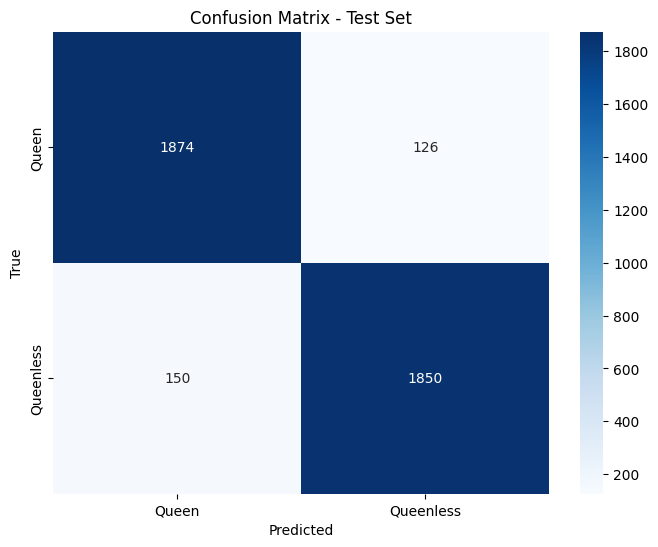

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of class labels
class_labels = label_encoder.classes_

# Compute the confusion matrix
confusion_mat_test = confusion_matrix(test_labels, predicted_test_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_test, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
import joblib

svm_model_filename = "svm_model.pkl"
joblib.dump(svm, svm_model_filename)

rf_model_filename = "rf_model.pkl"
joblib.dump(rf, rf_model_filename)

['rf_model.pkl']

In [ ]:
#recurrent neural networks - RNN: Long Short-Term Memory networks (LSTM)

import numpy as np
import os
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder

# Folder paths for training, validation, and test data
TRAINING_DIR = "/tmp/MFCC numpy 20k bee dataset/train"
VALIDATION_DIR = "/tmp/MFCC numpy 20k bee dataset/val"
TEST_DIR = "/tmp/MFCC numpy 20k bee dataset/test"

# Load MFCC features from numpy arrays
def load_data(directory):
    mfcc_features = []
    labels = []

    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        for filename in os.listdir(label_dir):
            file_path = os.path.join(label_dir, filename)
            if not os.path.isfile(file_path):
                continue
            mfcc = np.load(file_path)
            mfcc_features.append(mfcc)
            labels.append(label)

    return mfcc_features, labels

# Load training data
train_mfcc_features, train_labels = load_data(TRAINING_DIR)

# Load validation data
val_mfcc_features, val_labels = load_data(VALIDATION_DIR)

# Load test data
test_mfcc_features, test_labels = load_data(TEST_DIR)

# Convert labels to numeric values
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.transform(val_labels)
encoded_test_labels = label_encoder.transform(test_labels)

# Convert the data to NumPy arrays
X_train = np.array(train_mfcc_features)
y_train = np.array(encoded_train_labels)

X_val = np.array(val_mfcc_features)
y_val = np.array(encoded_val_labels)

X_test = np.array(test_mfcc_features)
y_test = np.array(encoded_test_labels)

# Reshape the input data to include timestep dimension
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(512, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the callback for stopping training
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_LSTM = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping_callback])

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

#25p (128-epoch 77)
#25p (256-epoch 29) Test Loss: 0.1918896585702896/Test Accuracy: 0.918749988079071
#108p (512-epoch 52) Test Loss: 0.17296117544174194/Test Accuracy: 0.934249997138977

Epoch 1/100
110/110 [==============================] - 145s 1s/step - loss: 0.6319 - accuracy: 0.6204 - val_loss: 0.5702 - val_accuracy: 0.7165
Epoch 2/100
110/110 [==============================] - 123s 1s/step - loss: 0.5014 - accuracy: 0.7541 - val_loss: 0.4844 - val_accuracy: 0.7660
Epoch 3/100
110/110 [==============================] - 123s 1s/step - loss: 0.4478 - accuracy: 0.7896 - val_loss: 0.4144 - val_accuracy: 0.8115
Epoch 4/100
110/110 [==============================] - 126s 1s/step - loss: 0.4000 - accuracy: 0.8159 - val_loss: 0.4015 - val_accuracy: 0.8195
Epoch 5/100
110/110 [==============================] - 121s 1s/step - loss: 0.3455 - accuracy: 0.8475 - val_loss: 0.3576 - val_accuracy: 0.8495
Epoch 6/100
110/110 [==============================] - 121s 1s/step - loss: 0.3282 - accuracy: 0.8555 - val_loss: 0.3459 - val_accuracy: 0.8420
Epoch 7/100
110/110 [==============================] - 122s 1s/step - loss: 0.3065 - accuracy: 0.8686 - val_loss: 0.3180 - val_accuracy:

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).flatten().astype(int)
confusion_matrix_result = confusion_matrix(y_test, y_pred_classes)
classification_report_result = classification_report(y_test, y_pred_classes)
print("Long Short-Term Memory networks:")
print("Confusion Matrix:")
print(confusion_matrix_result)
print("Classification Report:")
print(classification_report_result)

125/125 [==============================] - 13s 97ms/step
Long Short-Term Memory networks:
Confusion Matrix:
[[1902   98]
 [ 165 1835]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2000
           1       0.95      0.92      0.93      2000

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000



In [ ]:
model.save('/content/drive/MyDrive/Models/LSTM1D.h5')

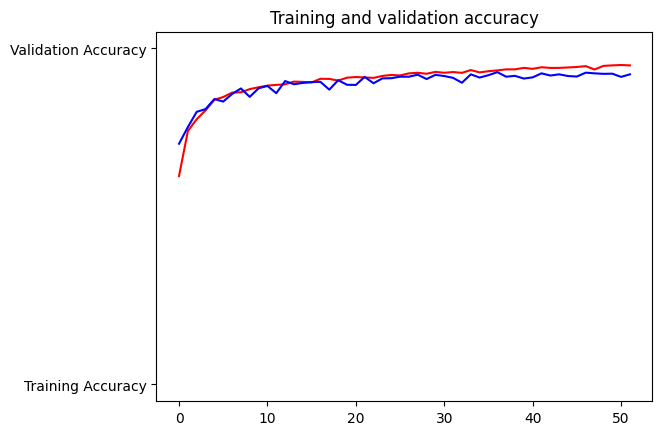

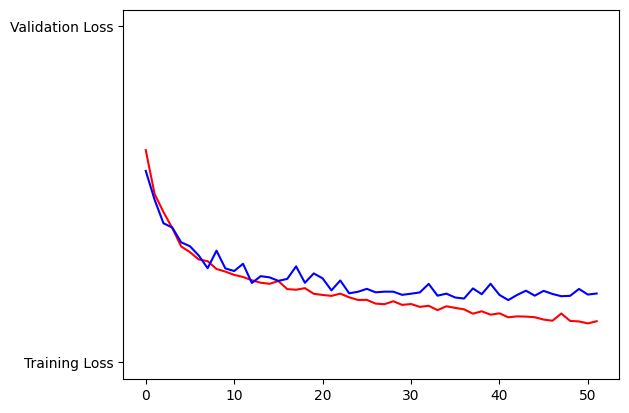

In [ ]:
acc=history_LSTM.history['accuracy']
val_acc=history_LSTM.history['val_accuracy']
loss=history_LSTM.history['loss']
val_loss=history_LSTM.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
#KNN

import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

TRAINING_DIR = "/tmp/MFCC numpy 20k bee dataset/train"
VALIDATION_DIR = "/tmp/MFCC numpy 20k bee dataset/val"
TEST_DIR = "/tmp/MFCC numpy 20k bee dataset/test"

def load_data(directory):
    mfcc_features = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        for filename in os.listdir(label_dir):
            file_path = os.path.join(label_dir, filename)
            if not os.path.isfile(file_path):
                continue
            mfcc = np.load(file_path)
            mfcc_features.append(mfcc)
            labels.append(label)
    return mfcc_features, labels

train_mfcc_features, train_labels = load_data(TRAINING_DIR)
val_mfcc_features, val_labels = load_data(VALIDATION_DIR)
test_mfcc_features, test_labels = load_data(TEST_DIR)

label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.transform(val_labels)
encoded_test_labels = label_encoder.transform(test_labels)

X_train = np.array(train_mfcc_features)
y_train = np.array(encoded_train_labels)

X_val = np.array(val_mfcc_features)
y_val = np.array(encoded_val_labels)

X_test = np.array(test_mfcc_features)
y_test = np.array(encoded_test_labels)

k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

y_pred = model.predict(X_test)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Test Accuracy: 0.92175
Confusion Matrix:
[[1892  108]
 [ 205 1795]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2000
           1       0.94      0.90      0.92      2000

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000



In [ ]:
#GMM

import numpy as np
import os
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

TRAINING_DIR = "/tmp/MFCC numpy 20k bee dataset/train"
VALIDATION_DIR = "/tmp/MFCC numpy 20k bee dataset/val"
TEST_DIR = "/tmp/MFCC numpy 20k bee dataset/test"

def load_data(directory):
    mfcc_features = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        for filename in os.listdir(label_dir):
            file_path = os.path.join(label_dir, filename)
            if not os.path.isfile(file_path):
                continue
            mfcc = np.load(file_path)
            mfcc_features.append(mfcc)
            labels.append(label)
    return mfcc_features, labels

train_mfcc_features, train_labels = load_data(TRAINING_DIR)
val_mfcc_features, val_labels = load_data(VALIDATION_DIR)
test_mfcc_features, test_labels = load_data(TEST_DIR)

label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.transform(val_labels)
encoded_test_labels = label_encoder.transform(test_labels)

X_train = np.array(train_mfcc_features)
y_train = np.array(encoded_train_labels)

X_val = np.array(val_mfcc_features)
y_val = np.array(encoded_val_labels)

X_test = np.array(test_mfcc_features)
y_test = np.array(encoded_test_labels)

gmm = GaussianMixture(n_components=len(label_encoder.classes_))
gmm.fit(X_train)

y_pred = gmm.predict(X_test)
accuracy = gmm.score(X_test, y_test)
print("Test Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Test Accuracy: -62.60842272333677
Confusion Matrix:
[[1804  196]
 [1797  203]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.90      0.64      2000
           1       0.51      0.10      0.17      2000

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.41      4000
weighted avg       0.50      0.50      0.41      4000



In [ ]:
#XGboost

import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import xgboost as xgb

TRAINING_DIR = "/tmp/MFCC numpy 20k bee dataset/train"
VALIDATION_DIR = "/tmp/MFCC numpy 20k bee dataset/val"
TEST_DIR = "/tmp/MFCC numpy 20k bee dataset/test"

def load_data(directory):
    mfcc_features = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        for filename in os.listdir(label_dir):
            file_path = os.path.join(label_dir, filename)
            if not os.path.isfile(file_path):
                continue
            mfcc = np.load(file_path)
            mfcc_features.append(mfcc)
            labels.append(label)
    return mfcc_features, labels

train_mfcc_features, train_labels = load_data(TRAINING_DIR)
val_mfcc_features, val_labels = load_data(VALIDATION_DIR)
test_mfcc_features, test_labels = load_data(TEST_DIR)

label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.transform(val_labels)
encoded_test_labels = label_encoder.transform(test_labels)

X_train = np.array(train_mfcc_features)
y_train = np.array(encoded_train_labels)

X_val = np.array(val_mfcc_features)
y_val = np.array(encoded_val_labels)

X_test = np.array(test_mfcc_features)
y_test = np.array(encoded_test_labels)

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# Create the XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on validation data
y_val_pred = model.predict(X_val)

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Generate and print the classification report
report = classification_report(y_val, y_val_pred)
print("Classification Report:")
print(report)

# Evaluate the model on test data
y_test_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)


Confusion Matrix:
[[948  52]
 [ 81 919]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1000
           1       0.95      0.92      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Test Accuracy: 0.9465


In [ ]:
#PCA

import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier

TRAINING_DIR = "/tmp/MFCC numpy 20k bee dataset/train"
VALIDATION_DIR = "/tmp/MFCC numpy 20k bee dataset/val"
TEST_DIR = "/tmp/MFCC numpy 20k bee dataset/test"

def load_data(directory):
    mfcc_features = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        for filename in os.listdir(label_dir):
            file_path = os.path.join(label_dir, filename)
            if not os.path.isfile(file_path):
                continue
            mfcc = np.load(file_path)
            mfcc_features.append(mfcc)
            labels.append(label)
    return mfcc_features, labels

train_mfcc_features, train_labels = load_data(TRAINING_DIR)
val_mfcc_features, val_labels = load_data(VALIDATION_DIR)
test_mfcc_features, test_labels = load_data(TEST_DIR)

label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.transform(val_labels)
encoded_test_labels = label_encoder.transform(test_labels)

X_train = np.array(train_mfcc_features)
y_train = np.array(encoded_train_labels)

X_val = np.array(val_mfcc_features)
y_val = np.array(encoded_val_labels)

X_test = np.array(test_mfcc_features)
y_test = np.array(encoded_test_labels)

# Apply PCA to the training data
pca = PCA(n_components=min(X_train.shape[0], X_train.shape[1]))
X_train_pca = pca.fit_transform(X_train)

# Apply the same PCA transformation to the validation and test data
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Build the gradient boosting model
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train_pca, y_train)

# Predict labels for validation data
y_val_pred = model.predict(X_val_pca)

# Calculate and print the accuracy of validation data
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Predict labels for test data
y_test_pred = model.predict(X_test_pca)

# Calculate and print the accuracy of test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Print the confusion matrix for test data
confusion_mat = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(confusion_mat)

report = classification_report(y_val, y_val_pred)
print("Classification Report:")
print(report)


Validation Accuracy: 0.866
Test Accuracy: 0.86075
Confusion Matrix:
[[1773  227]
 [ 330 1670]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1000
           1       0.89      0.83      0.86      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [ ]:
#LDA - LINEAR DISCRIMINANT ANALYSYS

import numpy as np
import os
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

TRAINING_DIR = "/tmp/MFCC numpy 20k bee dataset/train"
VALIDATION_DIR = "/tmp/MFCC numpy 20k bee dataset/val"
TEST_DIR = "/tmp/MFCC numpy 20k bee dataset/test"

def load_data(directory):
    mfcc_features = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        for filename in os.listdir(label_dir):
            file_path = os.path.join(label_dir, filename)
            if not os.path.isfile(file_path):
                continue
            mfcc = np.load(file_path)
            mfcc_features.append(mfcc)
            labels.append(label)
    return mfcc_features, labels

train_mfcc_features, train_labels = load_data(TRAINING_DIR)
val_mfcc_features, val_labels = load_data(VALIDATION_DIR)
test_mfcc_features, test_labels = load_data(TEST_DIR)

label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.transform(val_labels)
encoded_test_labels = label_encoder.transform(test_labels)

X_train = np.array(train_mfcc_features)
y_train = np.array(encoded_train_labels)

X_val = np.array(val_mfcc_features)
y_val = np.array(encoded_val_labels)

X_test = np.array(test_mfcc_features)
y_test = np.array(encoded_test_labels)

# Flatten the MFCC features
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_val = lda.transform(X_val)
X_test = lda.transform(X_test)

# Build the classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.7865
Confusion Matrix:
[[1637  363]
 [ 491 1509]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      2000
           1       0.81      0.75      0.78      2000

    accuracy                           0.79      4000
   macro avg       0.79      0.79      0.79      4000
weighted avg       0.79      0.79      0.79      4000



In [ ]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
import pickle

# Folder paths
TRAINING_DIR = "/tmp/MFCC numpy 20k bee dataset/train"
VALIDATION_DIR = "/tmp/MFCC numpy 20k bee dataset/val"
TEST_DIR = "/tmp/MFCC numpy 20k bee dataset/test"

# Load MFCC features from numpy arrays
def load_data(directory):
    mfcc_features = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        for filename in os.listdir(label_dir):
            file_path = os.path.join(label_dir, filename)
            if not os.path.isfile(file_path):
                continue
            mfcc = np.load(file_path)
            mfcc_features.append(mfcc)
            labels.append(label)
    return mfcc_features, labels

# Load data
train_mfcc_features, train_labels = load_data(TRAINING_DIR)
val_mfcc_features, val_labels = load_data(VALIDATION_DIR)
test_mfcc_features, test_labels = load_data(TEST_DIR)

# Convert labels to numeric values
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.transform(val_labels)
encoded_test_labels = label_encoder.transform(test_labels)

# Convert the data to NumPy arrays
X_train = np.array(train_mfcc_features)
y_train = np.array(encoded_train_labels)

X_val = np.array(val_mfcc_features)
y_val = np.array(encoded_val_labels)

X_test = np.array(test_mfcc_features)
y_test = np.array(encoded_test_labels)

# Reshape the input data to flatten it
X_train_flattened = X_train.reshape((X_train.shape[0], -1))
X_val_flattened = X_val.reshape((X_val.shape[0], -1))
X_test_flattened = X_test.reshape((X_test.shape[0], -1))

# Create the DBN
dbn = Pipeline(steps=[
    ('rbm1', BernoulliRBM(n_components=512, learning_rate=0.0001, n_iter=256, verbose=1)),
    ('rbm2', BernoulliRBM(n_components=256, learning_rate=0.0001, n_iter=256, verbose=1)),
    ('rbm3', BernoulliRBM(n_components=128, learning_rate=0.0001, n_iter=256, verbose=1)),
    ('rbm4', BernoulliRBM(n_components=64, learning_rate=0.0001, n_iter=256, verbose=1)),
    ('rbm5', BernoulliRBM(n_components=32, learning_rate=0.0001, n_iter=256, verbose=1))
    # ('rbm6', BernoulliRBM(n_components=16, learning_rate=0.0001, n_iter=200, verbose=1))
])

# Train the DBN model
dbn.fit(X_train_flattened, y_train)

# Transform the MFCC features
X_train_transformed = dbn.transform(X_train_flattened)
X_val_transformed = dbn.transform(X_val_flattened)

#Gradient Boosting classifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed, y_train)

# Evaluate the classifier
accuracy = classifier.score(X_val_transformed, y_val)
print("Validation Accuracy: {:.2f}%".format(accuracy * 100))

# Save the DBN and classifier
# with open("dbn_model.pkl", "wb") as f:
#     pickle.dump(dbn, f)

# with open("classifier_model.pkl", "wb") as f:
#     pickle.dump(classifier, f)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -42.51, time = 0.93s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -63.47, time = 2.23s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -104.98, time = 2.34s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -137.86, time = 1.56s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -128.70, time = 1.48s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -210.46, time = 1.48s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -245.37, time = 1.47s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -297.32, time = 1.50s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -368.35, time = 1.47s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -314.63, time = 1.62s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -431.97, time = 2.33s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -530.05, time = 2.47s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -599.19, time = 2.35s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -472.33, time = 1.99s
[BernoulliRBM] It

In [ ]:
# Support Vector Machines (SVM)                         (x)
# Random Forests                                        (x)
# Gradient Boosting Methods (e.g., XGBoost, LightGBM)   (x)
# Convolutional Neural Networks (CNN)                   (x)
# RNN: Long Short-Term Memory networks (LSTM)           (x)
# Gaussian Mixture Models (GMM)                         (x)
# K-Nearest Neighbors (KNN)                             (x)
# Principal Component Analysis (PCA)                    (x)
# LDA LINEAR DISCRIMINANT ANALYSYS                      (x)
# Naive Bayes
# Deep Belief Networks (DBN)                            (x)
# Self-Organizing Maps (SOM)
# Extreme Learning Machines (ELM)
# Ensemble Methods (e.g., Stacking, Voting)